# 확률 밀도 함수의 독립

(정의)  
두 확률 변수의 joint PDF가 marginal PDF의 곱으로 나타나면  
두 확률 변수가 서로 **독립(independent)**한다.

(수식)
$$f_{XY}(x, y) = f_X(x)f_Y(y)$$

- 독립인 경우, marginal PDF으로 joint PDF의 **모양**이 결정된다. 모양은 변하지 않는다.

## 반복시행

같은 확류변수를 가지고, 반복시행을 통해 여러 표본을 수집할 때, _대부분_ 독립이다.
$$f(x_1, x_2, x_3, \cdots, x_N ) = \prod_{i=1}^N f(x_i)$$

## 모멘트

### 독립 확률 변수의 기대값

(기대값)
$$\text{E}[XY] = \text{E}[X]\text{E}[Y]$$

(증명)

$$\begin{eqnarray}
\text{E}[XY] 
&=& \iint xy \;f_{XY}(x, y) \; dx dy  \\
&=& \iint  xy \;f_{X}(x)f_{Y}(y) \; dx dy \\
\end{eqnarray}$$

(Funini의 정리) 다중적분의 값 $\longrightarrow$ 적분을 연속한 값

$$\begin{eqnarray}
\text{E}[XY] 
&=& \int \left( \int xy \;f_{X}(x)f_{Y}(y) dx \right) dy \\
&=& \int \left( y\; f_{Y}(y) \left( \int x\; f_{X}(x) \; dx \right) \right) dy \\
&=& \left( \int x\;f_{X}(x) \; dx \right) \left( \int y\;f_{Y}(y) \; dy \right) \\
&=& \text{E}[X] \text{E}[Y] \\
\end{eqnarray}$$


(확장)

$$\text{E}[(X - \mu_X)(Y-\mu_Y)] = 0$$

(증명)

$$\begin{eqnarray}
\text{E}[(X - \mu_X)(Y-\mu_Y)] 
&=& \text{E}\left[XY - \mu_XY-\mu_YX + \mu_X\mu_Y\right] \\
&=& \text{E}[XY] - \mu_X\text{E}[Y]-\mu_Y\text{E}[X] + \mu_X\mu_Y  \\
&=& \text{E}[XY] - \mu_X\mu_Y  \\
&=& \text{E}[XY] - \text{E}[X]\text{E}[Y] = 0 
\end{eqnarray}$$

### 독립 확률 변수의 분산

(분산)
$$\text{Var}[X+Y] = \text{Var}[X] + \text{Var}[Y]$$

(증명)
$$
\begin{eqnarray}
\text{Var}[X + Y] 
&=& \text{E}[((X + Y) - (\mu_X + \mu_Y))^2] \\
&=& \text{E}[(X+Y)^2 - 2(X+Y)(\mu_X + \mu_Y) + (\mu_X + \mu_Y)^2] \\
&=& \text{E}[X^2+2XY+Y^2] - 2(\mu_X + \mu_Y)\text{E}[X+Y] + (\mu_X + \mu_Y)^2 \\
&=& \text{E}[X^2+2XY+Y^2] - 2(\mu_X + \mu_Y)^2 + (\mu_X + \mu_Y)^2 \\
&=& \text{E}[X^2]+2\text{E}[XY]+\text{E}[Y^2] - (\mu_X + \mu_Y)^2 \\
&=& \text{E}[X^2]+2\text{E}[X]\text{E}[Y]+\text{E}[Y^2] - (\mu_X^2 + 2\mu_X\mu_Y + \mu_Y^2) \\
&=& \text{E}[X^2]-\mu_X^2+\text{E}[Y^2]-\mu_Y^2+2\text{E}[X]\text{E}[Y] - 2\mu_X\mu_Y \\
&=& \text{Var}[X]+\text{Var}[Y] \\
\end{eqnarray}$$

# 독립인 두 확률 변수의 conditional PDF

$$f_{X \mid Y} (x | y) = \dfrac{f_{XY}(x, y)}{f_{Y}(y)} = \dfrac{f_{X}(x) f_{Y}(y)}{f_{Y}(y)} = f_{X}(x)$$

$$f_{Y \mid X} (y | x) = \dfrac{f_{XY}(x, y)}{f_{X}(x)} = \dfrac{f_{X}(x) f_{Y}(y)}{f_{X}(x)} = f_{Y}(y)$$

확률 변수 X가 Y에 독립이면
>- 조건부 확률분포 X가, 조건이 되는 Y의 영향을 받지 않는다.
>- Y값에 무엇을 넣든, X의 분포는 모양이 같다.
>- $f(x \mid y_1)$나 $f(x \mid y_2)$나 같다는 뜻


두 확률 변수가 독립이 아닌 경우,
- joint PDF가 marginal PDF로 나누어지지 않는 경우, 
>- 두 확률 변수는 서로 **의존(dependent)** 하다.

In [33]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

In [9]:
# 두 이산 확률 변수의 Joint PDF
np.set_printoptions(precision=4)
pmf1 = np.array([[1, 2, 3, 2, 1],
                 [2, 4, 6, 4, 2],
                 [4, 8,12, 8, 4],
                 [2, 4, 6, 4, 2],
                 [1, 2, 3, 2, 1]])
pmf1 = pmf1/pmf1.sum()
pmf1

array([[ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111],
       [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.0444,  0.0889,  0.1333,  0.0889,  0.0444],
       [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111]])

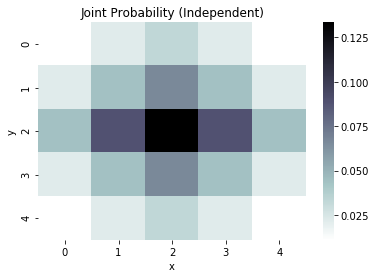

In [10]:
sns.heatmap(pmf1, cmap=mpl.cm.bone_r)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability (Independent)")
plt.show()

In [12]:
# 주변 확률 분포의 곱으로도 같은 값
pmf1_marginal_x = pmf1.sum(axis=0) # 확률변수 X
pmf1_marginal_y = pmf1.sum(axis=1) # 확률변수 Y
pmf = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]
pmf/pmf.sum()

array([[ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111],
       [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.0444,  0.0889,  0.1333,  0.0889,  0.0444],
       [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111]])

In [23]:
# y[0]일 때, 조건부 확률
cond_x_y0 = pmf1[0, :]/pmf1_marginal_y[0]
cond_x_y0

array([ 0.1111,  0.2222,  0.3333,  0.2222,  0.1111])

In [24]:
# y[1]일 때, 조건부 확률
cond_x_y0 = pmf1[1, :]/pmf1_marginal_y[1]
cond_x_y0

array([ 0.1111,  0.2222,  0.3333,  0.2222,  0.1111])

In [26]:
# y[2]일 때, 조건부 확률
cond_x_y0 = pmf1[2, :]/pmf1_marginal_y[2]
cond_x_y0

array([ 0.1111,  0.2222,  0.3333,  0.2222,  0.1111])

#### 다른 결합분포의 예

In [27]:
pmf2 = np.array([[0, 0, 0, 1, 1],
                 [0, 0, 2, 3, 1],
                 [0, 2, 5, 2, 0],
                 [1, 3, 2, 0, 0],
                 [1, 1, 0, 0, 0]])
pmf2 = pmf2/pmf2.sum()
pmf2

array([[ 0.  ,  0.  ,  0.  ,  0.04,  0.04],
       [ 0.  ,  0.  ,  0.08,  0.12,  0.04],
       [ 0.  ,  0.08,  0.2 ,  0.08,  0.  ],
       [ 0.04,  0.12,  0.08,  0.  ,  0.  ],
       [ 0.04,  0.04,  0.  ,  0.  ,  0.  ]])

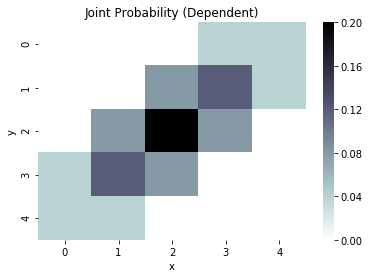

In [28]:
sns.heatmap(pmf2, cmap=mpl.cm.bone_r)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability (Dependent)")
plt.show()

In [29]:
pmf2_marginal_x = pmf2.sum(axis=0)
pmf2_marginal_y = pmf2.sum(axis=1)

In [30]:
# y의 값에 따라 x의 분포가 달라짐
cond_x_y0 = pmf2[0, :]/pmf2_marginal_y[0]
cond_x_y0

array([ 0. ,  0. ,  0. ,  0.5,  0.5])

In [31]:
cond_x_y1 = pmf2[1, :]/pmf2_marginal_y[1]
cond_x_y1

array([ 0.    ,  0.    ,  0.3333,  0.5   ,  0.1667])